## DAB200 -- Graded Lab 2

In this lab, you will gain some experience in converting non-numeric features in a dataset to numeric so they can be used in a machine learning model.

**Target**: to predict `Comb Unadj FE - Conventional Fuel`

**Note**: There may be other "features" similar to the target, so these need to be removed from the data.

**Data set**: make sure you use the data assigned to your group!

| Groups | Data set |
| :-: | :-: |
| 1-4 | veh15.csv |
| 5-7 | veh16.csv |
| 8-10 | veh17.csv |
| 11-14 | veh18.csv |
| 15-18 | veh19.csv |

**Important Notes:**
- Use [Chapter 6](https://mlbook.explained.ai/catvars.html) of the textbook as a **guide**:
     - you only need to use **random forest** models;
- Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
- Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
- Don't make assumptions!


### Part 0

Please provide the following information:
 - Group Number:   12
 - Group Members
     - Jonathan Alberto Calle Zuniga (0825959)
     - Jonathan Chukwuma OTEH (0775057)
     - Ali Salman (0840471)


### Part 1 - Create and evaluate an initial model

In this part you should:
 - read in the data
 - isolate all numeric features from original data set
 - verify there are no missing values
 - create and evaluate a baseline model

#### Code (15 marks)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from rfpimp import *

In [ ]:
#!pip install rfpimp

In [ ]:
veh_18 = pd.read_csv("https://raw.githubusercontent.com/joncalle/ML1/main/veh18.csv")
print(veh_18.shape) # print rows, columns
veh_18.head(2)      # dump first 2 rows

(1163, 12)


,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?
0,5.2,12,22.8444,8,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,Y,N
1,4.0,8,26.6603,8,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,N,N


In [ ]:
#isolate all numeric features from original data set
features = ['Eng Displ', '# Cyl', 'Comb Unadj FE - Conventional Fuel', '# Gears',
       'Max Ethanol % - Gasoline', 'Intake Valves Per Cyl',
       'Exhaust Valves Per Cyl']

df_veh = veh_18[features]

In [ ]:
#verify there are no missing values
veh_18.isna().sum()

Eng Displ                            0
# Cyl                                0
Comb Unadj FE - Conventional Fuel    0
# Gears                              0
Max Ethanol % - Gasoline             0
Intake Valves Per Cyl                0
Exhaust Valves Per Cyl               0
Fuel Metering Sys Desc               0
Air Aspiration Method Desc           0
Trans Desc                           0
Cyl Deact?                           0
Var Valve Lift?                      0
dtype: int64

In [ ]:
X, y = df_veh.drop('Comb Unadj FE - Conventional Fuel', axis = 1), df_veh['Comb Unadj FE - Conventional Fuel']
oob_scores = []
predictions_1 =[]
for i in range(10):
    rf_part1 = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_part1.fit(X_train, y_train)
    oob_scores.append(rf_part1.oob_score_)


avg_oob_scores_1 = sum(oob_scores) / len(oob_scores)

print(f"Average OOB score over 10 runs for model 1: {avg_oob_scores_1:.4f}")

Average OOB score over 10 runs for model 1: 0.7224


#### Question (5 marks)
Explain the purpose of creating a baseline model.

Baseline model is used to measure any improvements in model, it also serves as a point of comparison to check if all future models are better that the intitial and usually simple one.

### Part 2 - Convert non-numeric features to numeric

In this part you should:
 - convert **all** non-numeric features to numeric
 - one of the conversions should use **one-hot encoding**
 - create **one new feature** by combining 2 or more of the existing features

#### Code (25 marks)

In [ ]:
features = ['Fuel Metering Sys Desc','Air Aspiration Method Desc','Trans Desc','Cyl Deact?','Var Valve Lift?']
df2 = veh_18[features]
for col in df2:
  print(df2[col].unique())

['Multipoint/sequential fuel injection' 'Spark Ignition Direct Injection'
 'Spark Ignition direct & ported injection']
['Turbocharged' 'Naturally Aspirated' 'Supercharged'
 'Turbocharged+Supercharged']
['Semi-Automatic' 'Manual'
 'Automated Manual- Selectable (e.g. Automated Manual with paddles)'
 'Automatic' 'Automated Manual' 'Continuously Variable'
 'Selectable Continuously Variable (e.g. CVT with paddles)']
['Y' 'N']
['N' 'Y']


In [ ]:
 # label encoding is used to simply convert each category to a numeric value, while ignoring the fact that the categories are not really ordered, it is just Y or N
fea1 = 'Fuel Metering Sys Desc'
veh_18[fea1] = veh_18[fea1].astype('category').cat.as_ordered()
veh_18[fea1] = veh_18[fea1].cat.codes + 1
print(veh_18[fea1].value_counts())


2    834
1    251
3     78
Name: Fuel Metering Sys Desc, dtype: int64


In [ ]:
fea2 = 'Air Aspiration Method Desc'
veh_18[fea2] = veh_18[fea2].astype('category').cat.as_ordered()
veh_18[fea2] = veh_18[fea2].cat.codes + 1
print(veh_18[fea2].value_counts())

3    614
1    489
2     51
4      9
Name: Air Aspiration Method Desc, dtype: int64


In [ ]:
fea3 = 'Trans Desc'
veh_18[fea3] = veh_18[fea3].astype('category').cat.as_ordered()
veh_18[fea3] = veh_18[fea3].cat.codes + 1
print(veh_18[fea3].value_counts())

7    529
3    246
5    165
2    103
6     46
1     45
4     29
Name: Trans Desc, dtype: int64


In [ ]:
fea4 = 'Cyl Deact?'
veh_18[fea4] = veh_18[fea4].map({'Y':1,'N':0})
print(veh_18[fea4].value_counts())

0    1017
1     146
Name: Cyl Deact?, dtype: int64


In [ ]:
fea5 = 'Var Valve Lift?'
veh_18[fea5] = veh_18[fea5].map({'N':0,'Y':1})
print(veh_18[fea5].value_counts())

0    806
1    357
Name: Var Valve Lift?, dtype: int64


#### Explanation (25 marks)

Please provide an explanation for each conversion from non-numeric to numeric and state why this conversion is appropriate. Please also provide an explanation of the new feature created.

1. We selected all the non numeric features to convert the features to numerical data as input for easy machine learning algorithms and mathematical operations that is required
2. We convert from non-numeric to numeric in the folowing reason below:
  - Encoding categorical variables: Hence, Non-numeric features frequently indicate categorical variables with several levels or classes. The algorithms can correctly analyse and make use of the data when these categorical variables are converted to numeric utilising methods like one-hot encoding or label encoding. This conversion aids in capturing any underlying order or relationships between the categories.
  - Numeric features allow for the production of new features by carrying out operations such as arithmetic calculations, aggregates, or mathematical transformations. These extra patterns and connections that are captured by the derived features may improve the model's capacity for prediction.
  - Model compatibility: The majority of machine learning methods, including neural networks, decision trees, and linear regression, demand numeric input for both the features (independent variables) and the target variable (dependent variable). You may be certain that the data can be utilised as input for these models by changing non-numeric attributes to numeric ones.
  - Operations in mathematics: Numeric data can be used to perform operations in mathematics including addition, subtraction, multiplication, and division. These actions are necessary to carry out the computations and transformations that are frequently needed during model training, and data preprocessing and
  - Scaling and standardisation: Numeric features can be quickly and readily scaled to a common range. Feature scaling, which involves transforming features to have a comparable scale or distribution, is advantageous to many machine learning methods. To ensure uniform treatment across various features, it might be necessary to transform non-numeric features to numeric and then scale them.

### Part 3 - Create and evaluate a final model

In this part you should:
 - create and evaluate a model using all the features from Parts 1 and 2 above

#### Code (15 marks)

In [ ]:
X2, y2 = veh_18.drop('Comb Unadj FE - Conventional Fuel', axis = 1), df_veh['Comb Unadj FE - Conventional Fuel']
oob_scores_2 = []

for i in range(10):
    rf_part2 = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
    rf_part2.fit(X_train, y_train)
    oob_scores_2.append(rf_part2.oob_score_)


avg_oob_scores_2 = sum(oob_scores_2) / len(oob_scores_2)
print(f"Average OOB score over 10 runs for model 2: {avg_oob_scores_2:.4f}")

Average OOB score over 10 runs for model 2: 0.8740


### Part 4 - Feature importances and comparison (10 marks)

In this part you should:
 - calculate the percent difference between the results of Part 1 and Part 3 (make sure you are using the correct formula for percent difference)
 - based on the percent difference, state whether or not the results of Part 3 are an improvement over the results of Part 1
 - use the `rfpimp` package to calculate and display the feature importances for all features

In [ ]:
print(avg_oob_scores_1)
print(avg_oob_scores_2)

0.7224172448368936
0.8739734197354407


In [ ]:
percent_difference = abs(avg_oob_scores_1 - avg_oob_scores_2) / ((avg_oob_scores_1 + avg_oob_scores_2) / 2) * 100
print(f"The percent difference between the results of Part 1 and Part 3 is: {percent_difference:.2f}%")

The percent difference between the results of Part 1 and Part 3 is: 18.99%


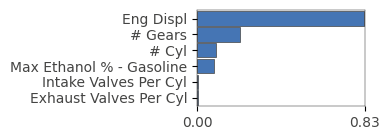

In [ ]:
# Display feature importances for Part 1
def showimp(rf, X, y):
    features = list(X.columns)

    I = importances(rf, X, y, features=features)
    plot_importances(I, color='#4575b4')

showimp(rf_part1, X, y)

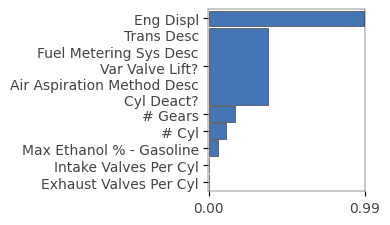

In [ ]:
# Display feature importances for Part 3
def showimp(rf_part2, X2, y2):
    features = list(X.columns)
    I = importances(rf_part2, X2, y2, features=features)
    plot_importances(I, color='#4575b4')

showimp(rf_part2, X2, y2)

#### Question (5 marks)

Based on the feature importances, are any features that you think should be removed from the data set.  Why do you think these features should be removed?


1. intake value per cyl
2. exhaust value per cyl

These features could potentially be removed because they have low feature importances in both Part 1 and Part 3. Low feature importances indicate that these features have less impact or correlation with the target variable, 'Comb Unadj FE - Conventional Fuel'. Removing such features can simplify the model and potentially improve its performance by reducing noise or irrelevant information.
